In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')
from matplotlib import rc

plt.rc('text', usetex=True)
plt.rc('font', family='sans')

# Module 2 - Project: Linkage design

In this notebook, you will build your own four-bar mechanical linkage and plot the path of the components. You can choose your own link sizes. Some areas of interest for different backgrounds:

- Automotive design: [windshield wiper motion](https://youtu.be/d4eLPEVJ64E), [watt linkage suspension](https://en.wikipedia.org/wiki/Watt%27s_linkage)
- biomechanics: [ACL-PCL knee joint model](https://www.youtube.com/watch?v=wWvB3lNYXB0) and [knee replacement](https://youtu.be/6aWOnEAPY8o)
- _anything else_?


In this notebook, you will step through the process of defining the
kinematics of a [four-bar
linkage](https://en.wikipedia.org/wiki/Four-bar_linkage). 

## What you'll do

- solve a series of nonlinear equations using
  [`fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)
- use solutions to create 2D
  [arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html) that vary in time and
  location
- plot and animate the motion of the four-bar linkage

## What you'll need

- Jupyter and Python - you can run this notebook with the "Launch" icon in the Engineering Dynamics online resource
- vector equations to solve for the constraints on the linkage mechanism
- A mechanical system to consider: choose three link lengths and the relative mounting position between the two
- some plots and background explanation to explain what your mechanism is supposed to do


![Diagram of a general four-bar linkage](./images/4bar-general.svg)

1. $l_1\sin\theta_1+l_2\sin\theta_2-l_3\sin\theta_3 -d_y = 0$
2. $l_1\cos\theta_1+l_2\cos\theta_2-l_3\cos\theta_3 -d_x = 0$

If you have one of the angles, e.g. $\theta_1$, you use equations 1 and 2
to solve for the other two angles, $\theta_2~and\theta_3$. Here you can
create a function and
use `fsolve`. The function input is a vector with two values and the output is a
vector with two values. 

$\bar{f}(\bar{x})= \left[\begin{array}{c}
f_1(\theta_2,~\theta_3) \\ 
f_2(\theta_2,~\theta_3)\end{array}\right]=\left[\begin{array}{c}
l_1\sin\theta_1+l_2\sin\theta_2-l_3\sin\theta_3 -d_y\\
l_1\cos\theta_1+l_2\cos\theta_2-l_3\cos\theta_3 -d_x
\end{array}\right]$

## Defining your system

As an example, I am creating a short arm that pivots a longer arm. Similar to a windshield wiper design

> __Note__: you can double-click this cell in Jupyter to edit the text. Then, you can update the geometry of your four-bar linkage. 

- link 1: $l_1 = 0.25~m$
- link 2: $l_2 = 1~m$
- link 3: $l_3 = 1~m$
- support: $d_x=0.95~m~and~d_y=0~m$

The constraint function is defined below as `Fbar`, a function of
$\theta_1$ and an array of $[\theta_2,~\theta_3]$ as such,

In [2]:
l1 = 0.25
l2 = 1
l3 = 1
a1 = np.pi/2
dy = 0
dx = 0.95
Fbar = lambda a1,x: np.array([l1*np.sin(a1)+l2*np.sin(x[0])-l3*np.sin(x[1])-dy,
                           l1*np.cos(a1)+l2*np.cos(x[0])-l3*np.cos(x[1])-dx])

Next, I choose a range of motion for link 1

$\theta_1 = (0,~2\pi) = (0,~360^o)$

and solve for the angles of links 2 and 3 as such

- initialize my variables `a1` as $0-2\pi$, `a2` as zeros, `a3` as zeros
- set an initial solution guess for `fsolve`
- use a `for-loop` to solve for `a2` and `a3` at each configuration

In [5]:
a1 = np.linspace(0, 2*np.pi)
a2 = np.zeros(len(a1))
a3 = np.zeros(len(a1))
xsol = np.array([0, np.pi/4])
for i in range(len(a1)):
    xsol = fsolve(lambda x: Fbar(a1[i], x), xsol)
    a2[i] = xsol[0]
    a3[i] = xsol[1]

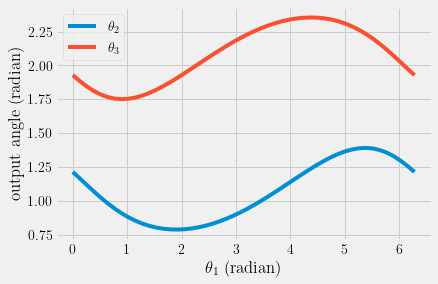

In [9]:
plt.plot(a1, a2, label = r'$\theta_2$')
plt.plot(a1, a3, label = r'$\theta_3$')
plt.xlabel(r'$\theta_1$ (radian)')
plt.ylabel('output angle (radian)')
plt.legend();

## Motion of the links

Now I have the position of the links, but I want to see what it looks like and what paths the components trace. Here, I use the vector definitions to define the positions of the links and connections

- $r_A = l_1 \cos\theta_1\hat{i} + l_1 \sin\theta_1\hat{j}$
- $r_B = r_A + r_{B/A} = r_A + l_2\cos\theta_2\hat{i} + l_2 \sin\theta_2\hat{j}$
- $r_C = r_B + r_{C/B} = r_B - l_3\cos\theta_3\hat{i} - l_3 \sin\theta_3\hat{j}$
- $r_P = r_A + r_{P/A} = r_A + \frac{l_2}{2}\cos\theta_2\hat{i} + \frac{l_2}{2} \sin\theta_2\hat{j}$

In [19]:
rA = l1*np.vstack([np.cos(a1), np.sin(a1)])
rB = rA + l2*np.vstack([np.cos(a2), np.sin(a2)])
rC = rB - l3*np.vstack([np.cos(a3), np.sin(a3)])
rP = rA + l2/2*np.vstack([np.cos(a2), np.sin(a2)])

### Plot one orientation and the paths

The paths of the links are now in the variables `rA`, `rB`, `rC`, and `rP`. I will plot the paths of these 4 points and the shape at a point in time. 

In [24]:
links_x_locations = np.vstack([np.zeros(len(a1)), 
                              rA[0, :],
                              rB[0, :],
                              rC[0, :]])

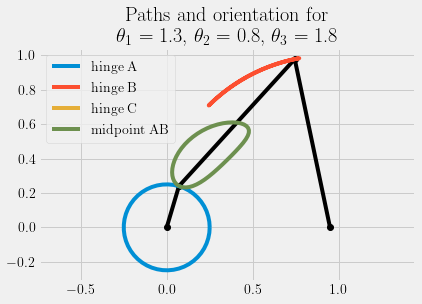

In [29]:
links_y_locations = np.vstack([np.zeros(len(a1)), 
                              rA[1, :],
                              rB[1, :],
                              rC[1, :]])
i = 10
plt.plot(links_x_locations[:, i], 
        links_y_locations[:, i], 'k-o')
plt.plot(rA[0,:], rA[1,:], label = 'hinge A')
plt.plot(rB[0,:], rB[1,:], label = 'hinge B')
plt.plot(rC[0,:], rC[1,:], label = 'hinge C')
plt.plot(rP[0,:], rP[1,:], label = 'midpoint AB')
plt.legend()
plt.title('Paths and orientation for\n'+ 
          r'$\theta_1$ = {:.1f}, $\theta_2$ = {:.1f}, $\theta_3$ = {:.1f}'.format(a1[i], a2[i], a3[i]))
plt.axis('equal');

## Determining the speed of the components

Now, I use the constraint equations from above to determine the speed of the link motion. 

$\frac{d\bar{f}(\bar{x})}{dt}= \left[\begin{array}{c}
f_1(\theta_2,~\theta_3) \\ 
f_2(\theta_2,~\theta_3)\end{array}\right]=\left[\begin{array}{c}
l_1\dot{\theta_1}\cos\theta_1+l_2\dot{\theta_2}\cos\theta_2-l_3\dot{\theta_3}\cos\theta_3\\
l_1\dot{\theta_1}\sin\theta_1+l_2\dot{\theta_2}\sin\theta_2-l_3\dot{\theta_3}\sin\theta_3
\end{array}\right]$

1. define the 2-equation function
2. initialize the solutions for the arrays: `da1`, `da2`, `da3`
3. solve the equations at each step in time in a `for-loop`

In [69]:
drive_rate = 10 #rad/s
dFbar = lambda a1, a2, a3, dx: np.array([l1*drive_rate*np.sin(a1)+\
                                         l2*dx[0]*np.sin(a2)-\
                                         l3*dx[1]*np.sin(a3),\
                                         l1*drive_rate*np.cos(a1)+\
                                         l2*dx[0]*np.cos(a2)-\
                                         l3*dx[1]*np.cos(a3)])



In [70]:
da1 = np.ones(len(a1))*10
da2 = np.zeros(len(a1))
da3 = np.zeros(len(a1))
xsol = np.array([0, 0])


for i in range(len(a1)):
    xsol = fsolve(lambda dx: dFbar(a1[i], a2[i], a3[i], dx), xsol)
    da2[i] = xsol[0]
    da3[i] = xsol[1]

Text(0, 0.5, 'output angular speed (radian/s)')

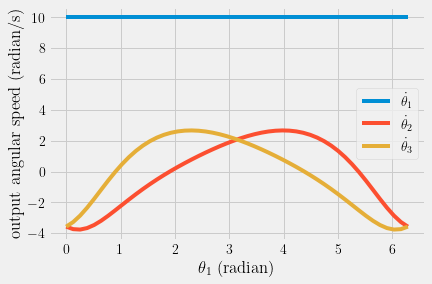

In [71]:
plt.plot(a1, da1, label = r'$\dot{\theta}_1$')
plt.plot(a1, da2, label = r'$\dot{\theta}_2$')
plt.plot(a1, da3, label = r'$\dot{\theta}_3$')
plt.legend()
plt.xlabel(r'$\theta_1$ (radian)')
plt.ylabel('output angular speed (radian/s)')

## Wrapping up

You should edit this notebook to create your own four-bar linkage analysis. 

- Choose a geometry
- plot the motion and paths 
- plot the speeds of the links
- add your own __wrapping up__ section to add any details or further analysis
- what did you learn?